In [ ]:
%pip install -U langchain langchain-core langchain-community langchain-ollama

  Using cached langchain-1.2.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached langchain_core-1.2.5-py3-none-any.whl.metadata (3.7 kB)
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_ollama-1.0.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached langgraph-1.0.5-py3-none-any.whl.metadata (7.4 kB)
  Using cached langgraph_prebuilt-1.0.5-py3-none-any.whl.metadata (5.2 kB)
  Using cached langgraph_sdk-0.3.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached ollama-0.6.1-py3-none-any.whl.metadata (4.3 kB)
Using cached langchain-1.2.0-py3-none-any.whl (102 kB)
Using cached langchain_core-1.2.5-py3-none-any.whl (484 kB)
Using cached langgraph-1.0.5-py3-none-any.whl (157 kB)
Using cached langgraph_prebuilt-1.0.5-py3-none-any.whl (35 kB)
Using cached langgraph_sdk-0.3.1-py3-none-any.whl (66 kB)
Using cached langchain_community-0.4.1-py3-none-any.whl (2.5 MB)
Using cached langchain_ollama-1.0.1-py3-none-any.whl (29 kB)
Using cached ollama-0.6

In [4]:

from langgraph.graph import StateGraph,START,END
from pipeline import run_research_pipeline
from typing_extensions import TypedDict
from typing import Any, Dict, List
from typing_extensions import TypedDict
from typing import Dict, List
from report_assembler import ResearchReport


In [5]:
class ResearchState(TypedDict):
    research_question: str
    intent: str
    sub_questions: List[str]
    synthesis: Dict[str, str]
    report: ResearchReport

In [6]:
def research_pipeline_node(state: dict):
    """
    Single LangGraph node wrapping the full pipeline
    """
    result = run_research_pipeline(state["research_question"])

    return {
        "intent": result["intent"],
        "sub_questions": result["sub_questions"],
        "synthesis": result["synthesis"],
        "report": result["report"]
    }

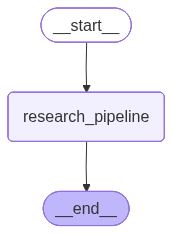

In [9]:
graph = StateGraph(ResearchState)


graph.add_node("research_pipeline", research_pipeline_node)



graph.add_edge(START,"research_pipeline")
graph.add_edge("research_pipeline",END)

graph.compile()